In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

pd.set_option("display.max_colwidth", None)
pd.options.display.float_format = "{:,.2f}".format

plt.rcParams.update({"font.size": 10.0 * 1.3})

In [2]:
import matplotlib.ticker


def si_format(x, pos):
    return (
        f"{x * 1e-9:1.0f}G"
        if x >= 1e9
        else (
            f"{x * 1e-6:1.0f}M"
            if x >= 1e6
            else f"{x * 1e-3:1.0f}K" if x >= 1e3 else f"{x:1.0f}"
        )
    )


si_formatter = matplotlib.ticker.FuncFormatter(si_format)


def si_format_decimal(x, pos):
    return (
        f"{x * 1e-9:1.1f}G"
        if x >= 1e9
        else (
            f"{x * 1e-6:1.1f}M"
            if x >= 1e6
            else f"{x * 1e-3:1.1f}K" if x >= 1e3 else f"{x:1.1f}"
        )
    )


si_formatter_decimal = matplotlib.ticker.FuncFormatter(si_format_decimal)

In [3]:
def load_benchmark_file(path: str) -> pd.DataFrame:
    with open(path) as file:
        data = json.load(file)

    df = pd.json_normalize(data, record_path="benchmarks")
    df = df.drop(
        columns=[
            "family_index",
            "per_family_instance_index",
            "run_type",
            "repetitions",
            "repetition_index",
            "threads",
            "run_name",
            "iterations",
            "time_unit",
            "real_time",
            "cpu_time",
            "bytes_per_second",
        ]
    )
    df["item_time_ns"] = 1.0 / df["items_per_second"] * 1000 * 1000 * 1000

    return df

In [4]:
CS_NAMESPACE_MAP = {
    "datasketches": "DataSketches",
    "naive": "Naïve",
    "fastrange": "Fastrange",
    "fixed_size": "Fixed Size",
    "final_no_murmur_unroll": "Single Hash",
    "final": "Single Hash \w Hash Unroll",
}

SS_NAMESPACE_MAP = {
    "datasketches": "DataSketches",
    "naive": "Naïve",
    "map": "Map",
    "heap": "Heap",
    "final": "SIMD",
}

KLL_NAMESPACE_MAP = {
    "datasketches": "DataSketches",
    "naive": "Naïve",
    "no_min_max": "No Min Max",
    "no_self_move_protection": "Branching Optimization",
    "cached_level_capacities": "Level Capacity Caching",
    "pcg_random": "Fast PCG Random",
    "final": "Fixed Size",
}

## SpaceSaving

Max speedup of final over naive: 7.03x
Max speedup of final over datasketches: 2.00x


,namespace,sketch,data_type,item_size,items_per_second,item_time_ns,speedup_over_datasketches,speedup_over_naive
0,datasketches,SpaceSaving,int16_t,2.00,"35,339,786.70",28.30,1.00,4.11
1,datasketches,SpaceSaving,int32_t,4.00,"32,102,956.67",31.15,1.00,2.71
2,datasketches,SpaceSaving,int64_t,8.00,"32,814,133.35",30.47,1.00,3.62
3,datasketches,SpaceSaving,int128_t,16.00,"30,623,535.29",32.65,1.00,4.24
4,datasketches,SpaceSaving,float,4.00,"21,903,943.31",45.65,1.00,3.52
5,datasketches,SpaceSaving,double,8.00,"24,359,297.45",41.05,1.00,3.85
6,datasketches,SpaceSaving,string,327.00,"5,966,294.88",167.61,1.00,1.86
7,naive,SpaceSaving,int16_t,2.00,"8,599,946.46",116.28,0.24,1.00
8,naive,SpaceSaving,int32_t,4.00,"11,867,240.53",84.27,0.37,1.00
9,naive,SpaceSaving,int64_t,8.00,"9,059,800.66",110.38,0.28,1.00


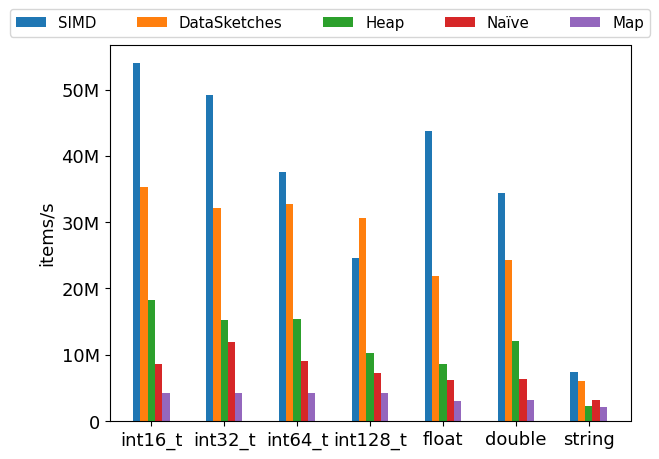

## CountSketch

Max speedup of final over naive: 8.63x
Max speedup of final over datasketches: 12.30x


,namespace,sketch,data_type,item_size,items_per_second,item_time_ns,speedup_over_datasketches,speedup_over_naive
35,datasketches,CountSketch,int16_t,2.00,"10,887,642.44",91.85,1.00,0.80
36,datasketches,CountSketch,int32_t,4.00,"10,324,559.65",96.86,1.00,0.73
37,datasketches,CountSketch,int64_t,8.00,"9,251,948.99",108.09,1.00,0.70
38,datasketches,CountSketch,int128_t,16.00,"9,765,663.99",102.40,1.00,0.76
39,datasketches,CountSketch,float,4.00,"10,266,551.44",97.40,1.00,0.74
40,datasketches,CountSketch,double,8.00,"9,193,196.08",108.78,1.00,0.68
41,datasketches,CountSketch,string,327.00,"8,803,740.36",113.59,1.00,3.15
42,naive,CountSketch,int16_t,2.00,"13,543,068.15",73.84,1.24,1.00
43,naive,CountSketch,int32_t,4.00,"14,147,622.16",70.68,1.37,1.00
44,naive,CountSketch,int64_t,8.00,"13,190,250.10",75.81,1.43,1.00


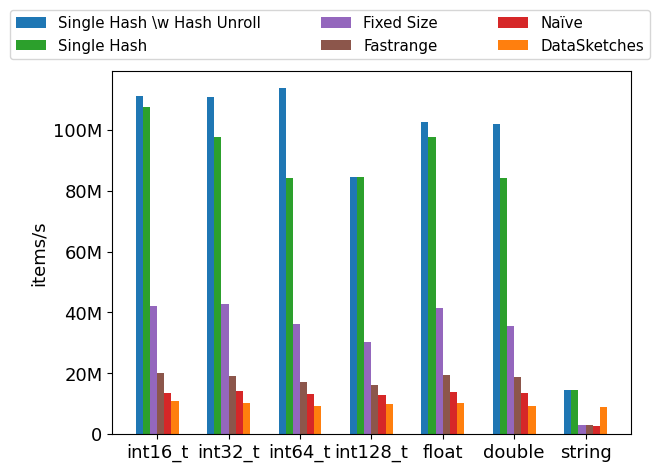

## KarninLangLiberty

Max speedup of final over naive: 446.00x
Max speedup of final over datasketches: 1.52x


,namespace,sketch,data_type,item_size,items_per_second,item_time_ns,speedup_over_datasketches,speedup_over_naive
84,datasketches,KarninLangLiberty,int16_t,2.00,"23,392,844.41",42.75,1.00,293.26
85,datasketches,KarninLangLiberty,int32_t,4.00,"24,698,001.17",40.49,1.00,309.20
86,datasketches,KarninLangLiberty,int64_t,8.00,"23,644,569.82",42.29,1.00,295.34
87,datasketches,KarninLangLiberty,int128_t,16.00,"17,667,965.13",56.60,1.00,220.79
88,datasketches,KarninLangLiberty,float,4.00,"23,458,909.20",42.63,1.00,293.65
89,datasketches,KarninLangLiberty,double,8.00,"21,753,396.72",45.97,1.00,272.52
90,datasketches,KarninLangLiberty,string,327.00,"5,464,931.60",182.98,1.00,69.01
91,no_min_max,KarninLangLiberty,int16_t,2.00,"24,917,776.61",40.13,1.07,312.38
92,no_min_max,KarninLangLiberty,int32_t,4.00,"26,154,108.44",38.23,1.06,327.43
93,no_min_max,KarninLangLiberty,int64_t,8.00,"26,285,040.68",38.04,1.11,328.33


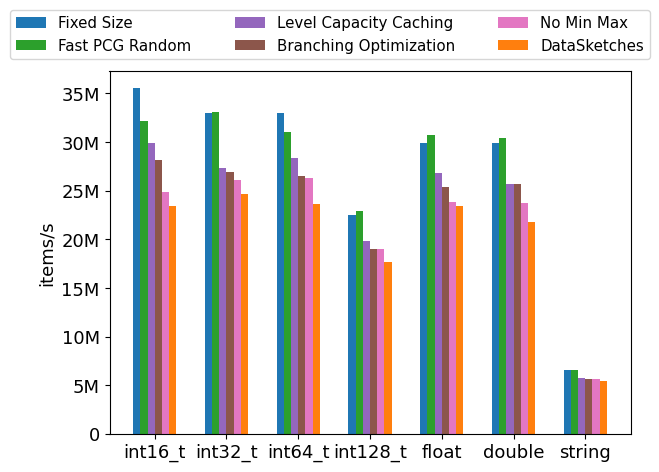

In [10]:
df_insert = load_benchmark_file("results/bm_insert.json")
df_insert[["sketch", "data_type"]] = df_insert["name"].str.extract(
    r"BM_Insert<([:\w]+)<([:\w]+)>"
)
df_insert["data_type"] = df_insert["data_type"].str.replace("std::", "")
df_insert["data_type"] = df_insert["data_type"].str.replace("__", "")

df_insert["sketch"] = df_insert["sketch"].str.replace("CountMinSketch", "CountSketch")
df_insert[["namespace", "sketch"]] = df_insert["sketch"].str.split("::", expand=True)
df_insert = df_insert[
    [
        "namespace",
        "sketch",
        "data_type",
        "item_size",
        "items_per_second",
        "item_time_ns",
    ]
]

sketches = df_insert["sketch"].unique()

for sketch in sketches:
    for data_type in df_insert["data_type"].unique():
        mask = (df_insert["sketch"] == sketch) & (df_insert["data_type"] == data_type)

        baseline_ds = df_insert.loc[
            mask & (df_insert["namespace"] == "datasketches"), "items_per_second"
        ].iloc[0]
        baseline_naive = df_insert.loc[
            mask & (df_insert["namespace"] == "naive"), "items_per_second"
        ].iloc[0]

        df_insert.loc[mask, "speedup_over_datasketches"] = (
            df_insert.loc[mask, "items_per_second"] / baseline_ds
        )
        df_insert.loc[mask, "speedup_over_naive"] = (
            df_insert.loc[mask, "items_per_second"] / baseline_naive
        )


for sketch in sketches:
    display(Markdown(f"## {sketch}"))

    fig, ax = plt.subplots()

    mask = df_insert["sketch"] == sketch
    data = df_insert[mask]

    max_speedup_over_naive = data[data["namespace"] == "final"][
        "speedup_over_naive"
    ].max()
    max_speedup_over_datasketches = data[data["namespace"] == "final"][
        "speedup_over_datasketches"
    ].max()

    print(f"Max speedup of final over naive: {max_speedup_over_naive:.2f}x")
    print(
        f"Max speedup of final over datasketches: {max_speedup_over_datasketches:.2f}x"
    )

    if sketch == "KarninLangLiberty":
        data = data[data["namespace"] != "naive"]

    display(data)

    data_types = data["data_type"].unique()
    x = np.arange(len(data_types))
    width = 0.1

    color_map = {"final": "C0", "naive": "C3", "datasketches": "C1"}

    namespaces = (
        data.groupby("namespace")["items_per_second"]
        .mean()
        .sort_values(ascending=False)
        .index
    )
    for i, namespace in enumerate(namespaces):
        next_color_idx = 1

        mask_ns = data["namespace"] == namespace
        values = [
            data[mask_ns & (data["data_type"] == dt)]["items_per_second"].iloc[0]
            for dt in data_types
        ]

        color = color_map.get(namespace)
        if color is None:
            while f"C{next_color_idx}" in color_map.values():
                next_color_idx += 1
            color = f"C{next_color_idx}"
            color_map[namespace] = color
            next_color_idx += 1

        ax.bar(
            x + i * width - (len(namespaces) - 1) * width / 2,
            values,
            width,
            label=namespace,
            color=color,
        )

    ax.set_ylabel("items/s")
    ax.set_xticks(x)
    ax.set_xticklabels(data_types)
    ax.yaxis.set_major_formatter(si_formatter)

    handles, labels = ax.get_legend_handles_labels()
    if sketch == "CountSketch":
        new_labels = [CS_NAMESPACE_MAP.get(label, label) for label in labels]
    elif sketch == "SpaceSaving":
        new_labels = [SS_NAMESPACE_MAP.get(label, label) for label in labels]
    elif sketch == "KarninLangLiberty":
        new_labels = [KLL_NAMESPACE_MAP.get(label, label) for label in labels]
    ax.legend(
        handles,
        new_labels,
        bbox_to_anchor=(0, 0.9, 1, 0) if sketch == "SpaceSaving" else (0, 0.88, 1, 0),
        loc="lower left",
        mode="expand",
        borderaxespad=0,
        ncol=5 if sketch =="SpaceSaving" else 3,
        fontsize="small",
        bbox_transform=fig.transFigure
    )

    fig.tight_layout()
    display(fig)
    fig.savefig(
        f"figures/{sketch}_insert.pdf", bbox_inches="tight", pad_inches=0, dpi=300
    )
    plt.close(fig)

,hash_function_name,data_type,item_size,items_per_second,item_time_ns,speedup
0,Hash,int16_t,2.00,"273,790,338.47",3.65,1.12
1,Hash,int32_t,4.00,"274,225,328.26",3.65,1.31
2,Hash,int64_t,8.00,"273,968,815.59",3.65,1.58
3,Hash,int128_t,16.00,"181,595,233.01",5.51,1.00
4,Hash,float,4.00,"266,517,128.92",3.75,1.27
5,Hash,double,8.00,"267,952,678.18",3.73,1.55
6,HashNoUnroll,int16_t,2.00,"244,037,112.94",4.10,1.00
7,HashNoUnroll,int32_t,4.00,"209,382,762.01",4.78,1.00
8,HashNoUnroll,int64_t,8.00,"173,049,987.26",5.78,1.00
9,HashNoUnroll,int128_t,16.00,"181,579,539.68",5.51,1.00


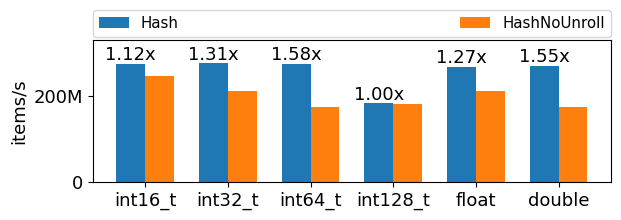

In [6]:
df_hash = load_benchmark_file("results/bm_hash.json")
df_hash[["hash_function_name", "data_type"]] = df_hash["name"].str.extract(
    r"BM_Hash<([:\w]+)Fn, ([:\w]+)>"
)
df_hash["data_type"] = df_hash["data_type"].str.replace("std::", "")
df_hash["data_type"] = (
    df_hash["data_type"].str.replace("__", "")
)
df_hash = df_hash[
    ["hash_function_name", "data_type", "item_size", "items_per_second", "item_time_ns"]
]

BASELINE = "HashNoUnroll"
df_hash_baseline = df_hash[df_hash["hash_function_name"] == BASELINE].set_index(
    "data_type"
)["items_per_second"]
df_hash["speedup"] = df_hash.apply(
    lambda row: row["items_per_second"] / df_hash_baseline[row["data_type"]], axis=1
)

display(df_hash)

fig, ax = plt.subplots(figsize=(6.4, 2.4))

hash_functions = df_hash["hash_function_name"].unique()
data_types = df_hash["data_type"].unique()

bar_width = 0.35
x = range(len(data_types))

for i, hash_fn in enumerate(hash_functions):
    mask = df_hash["hash_function_name"] == hash_fn
    bars = ax.bar(
        [xi + i * bar_width for xi in x],
        df_hash[mask]["items_per_second"],
        bar_width,
        label=hash_fn,
    )

    if hash_fn != BASELINE:
        for idx, bar in enumerate(bars):
            speedup = df_hash[mask]["speedup"].iloc[idx]
            if speedup > 1:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    f"{speedup:.2f}x",
                    horizontalalignment="center",
                    verticalalignment="bottom",
                )

ax.set_ylabel("items/s")
ax.set_xticks([xi + bar_width / 2 for xi in x])
ax.set_xticklabels(data_types)
ax.yaxis.set_major_formatter(si_formatter)
ax.set_ylim(0, df_hash["items_per_second"].max() * 1.2)
ax.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=0,
    ncol=2,
    fontsize="small",
)
fig.tight_layout()
fig.savefig(f"figures/hash.pdf", bbox_inches="tight", pad_inches=0, dpi=300)

,sketch,data_type,item_size,items_per_second,item_time_ns,speedup
0,SpaceSaving,int128_t,16.00,"31,468,256.39",31.78,1.28
1,SpaceSaving,string,327.00,"14,732,662.77",67.88,1.99
2,CountSketch,int16_t,2.00,"216,550,935.98",4.62,1.95
3,CountSketch,int32_t,4.00,"216,462,672.79",4.62,1.95
4,CountSketch,int64_t,8.00,"216,467,908.33",4.62,1.90
5,CountSketch,int128_t,16.00,"216,491,367.72",4.62,2.56
6,CountSketch,float,4.00,"216,392,296.56",4.62,2.11
7,CountSketch,double,8.00,"211,293,508.19",4.73,2.07
8,CountSketch,string,327.00,"216,442,887.02",4.62,15.11


## SpaceSaving

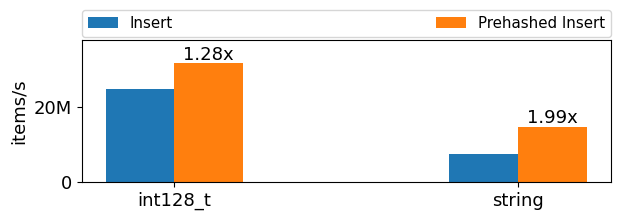

## CountSketch

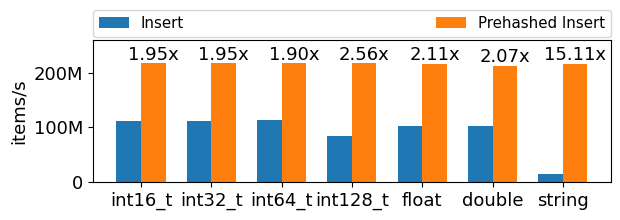

In [7]:
df_hash_insert = load_benchmark_file("results/bm_hash_insert.json")
df_hash_insert[["sketch", "data_type"]] = df_hash_insert["name"].str.extract(
    r"BM_HashInsert<([:\w]+)<([:\w]+)>"
)
df_hash_insert["data_type"] = df_hash_insert["data_type"].str.replace("std::", "")
df_hash_insert["data_type"] = (
    df_hash_insert["data_type"].str.replace("__", "")
)
df_hash_insert = df_hash_insert[
    ["sketch", "data_type", "item_size", "items_per_second", "item_time_ns"]
]
df_hash_insert[["namespace", "sketch"]] = df_hash_insert["sketch"].str.split(
    "::", expand=True
)
df_hash_insert = df_hash_insert[
    [
        "sketch",
        "data_type",
        "item_size",
        "items_per_second",
        "item_time_ns",
    ]
]

df_hash_insert_baseline = df_insert[df_insert["namespace"] == "final"].set_index(
    ["sketch", "data_type"]
)["items_per_second"]
df_hash_insert["speedup"] = df_hash_insert.apply(
    lambda row: row["items_per_second"]
    / df_hash_insert_baseline.loc[(row["sketch"], row["data_type"])],
    axis=1,
)

display(df_hash_insert)

sketches = df_hash_insert["sketch"].unique()
data_types = df_hash_insert["data_type"].unique()

for sketch in sketches:
    display(Markdown(f"## {sketch}"))
    fig, ax = plt.subplots(figsize=(6.4, 2.4))

    mask_hash = df_hash_insert["sketch"] == sketch
    mask_base = df_insert[df_insert["namespace"] == "final"]["sketch"] == sketch

    data_hash = df_hash_insert[mask_hash].set_index("data_type")
    data_base = df_insert[df_insert["namespace"] == "final"][mask_base].set_index(
        "data_type"
    )

    sketch_types = df_hash_insert[mask_hash]["data_type"].tolist()
    common_types = [t for t in sketch_types if t in data_base.index]
    x = np.arange(len(common_types))
    width = 0.35 if sketch == "CountSketch" else 0.2

    values_base = [data_base.loc[dt, "items_per_second"] for dt in common_types]
    values_hash = [data_hash.loc[dt, "items_per_second"] for dt in common_types]
    speedups = [data_hash.loc[dt, "speedup"] for dt in common_types]

    bars_base = ax.bar(x - width / 2, values_base, width, label="Insert")
    bars_hash = ax.bar(x + width / 2, values_hash, width, label="Prehashed Insert")

    for idx, (bar, speedup) in enumerate(zip(bars_hash, speedups)):
        if speedup > 1:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{speedup:.2f}x",
                horizontalalignment="center",
                verticalalignment="bottom",
            )

    ax.set_ylabel("items/s")
    ax.set_xticks(x)
    ax.set_xticklabels(common_types)
    ax.set_ylim(0, max(max(values_base), max(values_hash)) * 1.2) 
    ax.legend(
        bbox_to_anchor=(0, 1.02, 1, 0.2),
        loc="lower left",
        mode="expand",
        borderaxespad=0,
        ncol=2,
        fontsize="small",
    )
    ax.yaxis.set_major_formatter(si_formatter)


    fig.tight_layout()
    display(fig)
    fig.savefig(f"figures/{sketch}_hash_insert.pdf", bbox_inches="tight", pad_inches=0, dpi=300)
    plt.close(fig)